# Quantum Computer lab 1 

These lab exercises are **NOT** part of the assesment of the module, but they should be useful training for the coursework.

* This notebook introduces some of the basic quantum circuit functionality in the qiskit module
* Please run the code to make sure it works, then try the questions.

There is documentation about qiskit at https://qiskit.org/ and https://learning.quantum-computing.ibm.com/

##  Goals of the lab
* Install and run the qiskit modules
* Simulate quantum circuits using qiskit
* Use qiskit to produce state vectors from quantum circuits
* Navigate the qiskit documentation to solve problems

In later labs we will investigate introducing additional errors

## Installing qiskit

There is information on installing qiskit at:  https://qiskit.org/documentation/getting_started.html
I really recommend using a virtual enviroment to install qiskit

* You can run on IBM's simulator using  https://quantum-computing.ibm.com/


##  Installing qiskit on the University machines
These instructions are modified from the material developed by Vincent Drach

* Start the anconda prompt
* conda create --name qiskit
* conda activate qiskit
* conda install numpy matplotlib spyder-kernels
* pip install qiskit
* pip install qiskit[visualization]

In Spyder Open Tools -> Preferences
select "Use the following python interpreter" and select the path of your installation

C:/Users/vdrach/.conda/envs/qiskit/python.exe

To check the enviroment, restart the kernel in the console



## One qubit example circuit
https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

Run the example code below.


In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# Use Aer's qasm_simulator
simulator = QasmSimulator()

circuit = QuantumCircuit(1,1)

# Add a y gate on qubit 0
circuit.y(0)

# Map the quantum measurement to the classical bits
circuit.measure(0,0) 
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
numb_shots = 512
job = simulator.run(compiled_circuit, shots=numb_shots)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal number of measurements = ", numb_shots )
for key, value in counts.items():
    print("State = |" + key+"> measurements " , value)



Total number of measurements =  512
State = |1> measurements  512


In [3]:
# Draw the circuit
circuit.draw()

┌───┐┌─┐
  q: ┤ Y ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

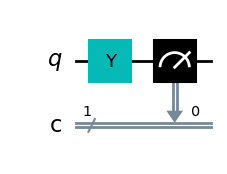

In [4]:
circuit.draw('mpl')

### Question 1 on the above one qubit circuit
* Assume an input state of $\mid 0>$ and apply the rules of gates to find the expected output state
* Does your theoretical result agree with the output from the circuit simulated above.
* Modify your code so that the measurements are printed as a histogram
* https://qiskit.org/documentation/stubs/qiskit.visualization.plot_histogram.html

###  Question 2 on the one qubit circuit

 <img src="https://github.com/cmcneile/Quantum_Computing_lab_2023/blob/main/2circuit.png?raw=true" alt="1qubit circuit"> 

* Modify the code above to implement the above quantum circuit (that was used in lectures)
* Does the measurements correspond to theoretical result for the input $\mid 0 \rangle$
* Modify the code so that the input is the state $\mid 1 \rangle$
* Run the circuit for 512, 1024, 2048 shots. Do you notice any patterns?
* Modify the code to produce a state vector (eg. the output $\frac{1}{\sqrt{2}} \mid 0 \rangle + \frac{1}{\sqrt{2}} \mid 1 \rangle$
* See this example code for statevector code  https://quantumcomputing.stackexchange.com/questions/13769/how-to-get-state-vector-from-qasmsimulator-in-qiskit

## Two qubit example circuit

This example was taken from 
https://qiskit.org/documentation/stable/0.35/intro_tutorial1.html

In [5]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
numb_shots = 512
job = simulator.run(compiled_circuit, shots=numb_shots)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)
print("\nTotal number of measurements = ", numb_shots )
for key, value in counts.items():
    print("State = |" + key+"> measurements " , value)




Total count for 00 and 11 are: {'11': 285, '00': 227}

Total number of measurements =  512
State = |11> measurements  285
State = |00> measurements  227


In [6]:

# Draw the circuit
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## Question 3 on the two-qubit circuit

* Assume an input state of $\mid 00 >$ apply the above quantum circuit and find the output state.
* Does your result agree with the output from the circuit 
* Run the circuit for 512, 1024, 2048  shots. Do you notice any patterns?

## Question 4

 <img src="https://github.com/cmcneile/Quantum_Computing_lab_2023/blob/main/InitCircuit.png?raw=true" alt="2 qubit circuit"> 
 
 * Modify the above code to implement this circuit that was shown in lectures (and the diagram above)

## Question 5 (superdense coding)

* In the second lecture of the module we studied superdense coding where two classical bits are transformed by sending one qubit from Alice to Bob.
* There is a qiskit example:
* https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information/entanglement-in-action#superdense-coding


In [7]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

The numbers below are the classical bits to transmit

In [20]:
c = "1"
d = "0"

In [21]:
protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw())

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

Measured 10 with frequency 1.0


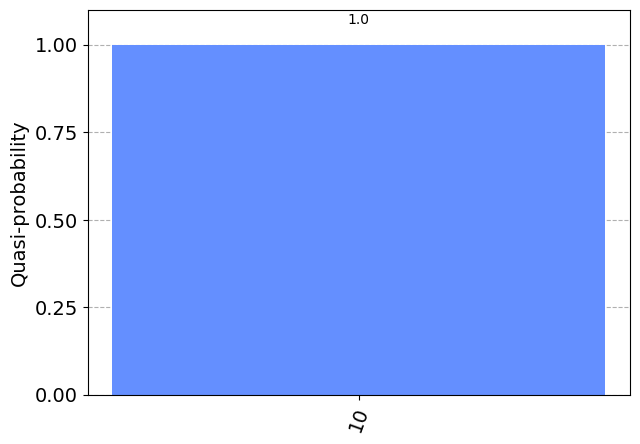

In [22]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

* Run the qiskit code above for the cases: 00, 01, 10, 11
* Check that the circuit works. If it does not work, modify the code

